<h1>ACTIVITY 3 - DENGUE DATA ANALYTICS PROJECT</h1>
<hr>

<h2>Analyst: Renato Cruz</h2>

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
import folium
from folium.plugins import HeatMap

In [2]:
deng=pd.read_csv('datasets//dengue.csv')

In [3]:
deng

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1
...,...,...,...,...,...
1015,August,2020,BARMM,91,0
1016,September,2020,BARMM,16,8
1017,October,2020,BARMM,13,9
1018,November,2020,BARMM,15,1


In [4]:
deng.columns = deng.columns.str.strip().str.lower().str.replace(' ', '_')

In [5]:
print("Cleaned column names:\n", deng.columns)
deng.head()

Cleaned column names:
 Index(['month', 'year', 'region', 'dengue_cases', 'dengue_deaths'], dtype='object')


,month,year,region,dengue_cases,dengue_deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1


<h1>Cleaning Data Frames</h1>
<hr>

In [6]:
deng.isnull().sum()

month            0
year             0
region           0
dengue_cases     0
dengue_deaths    0
dtype: int64

<h1>Data Types</h1>
<hr>

In [7]:
deng.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   month          1020 non-null   object
 1   year           1020 non-null   int64 
 2   region         1020 non-null   object
 3   dengue_cases   1020 non-null   int64 
 4   dengue_deaths  1020 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 40.0+ KB


In [8]:
deng.describe()

,year,dengue_cases,dengue_deaths
count,1020.000000,1020.000000,1020.000000
mean,2018.000000,1124.926471,16.513725
std,1.414907,1662.608878,96.358215
min,2016.000000,10.000000,0.000000
25%,2017.000000,247.750000,1.000000
50%,2018.000000,582.500000,3.000000
75%,2019.000000,1284.250000,7.000000
max,2020.000000,21658.000000,1651.000000


In [9]:
deng['month']=deng['month'].astype('category')
deng['year']=deng['year'].astype('category')
deng['region']=deng['region'].astype('category')
deng.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   month          1020 non-null   category
 1   year           1020 non-null   category
 2   region         1020 non-null   category
 3   dengue_cases   1020 non-null   int64   
 4   dengue_deaths  1020 non-null   int64   
dtypes: category(3), int64(2)
memory usage: 20.3 KB


<h1> Exploratory Data analysis</h1>
<hr>

<h1>1) Which year has the highest and lowest total number of dengue deaths overall?</h1>

In [19]:
deng.groupby('year')['dengue_deaths'].sum()

year
2016    8127
2017    4563
2018    1226
2019    1733
2020    1195
Name: dengue_deaths, dtype: int64

<h1>insights: no.1-2<h1>
2016 has the highest deaths based on the result
2020 ahas the lowest death based on the result</h1>

<h1>2) What is the average number of dengue cases per month?</h1>

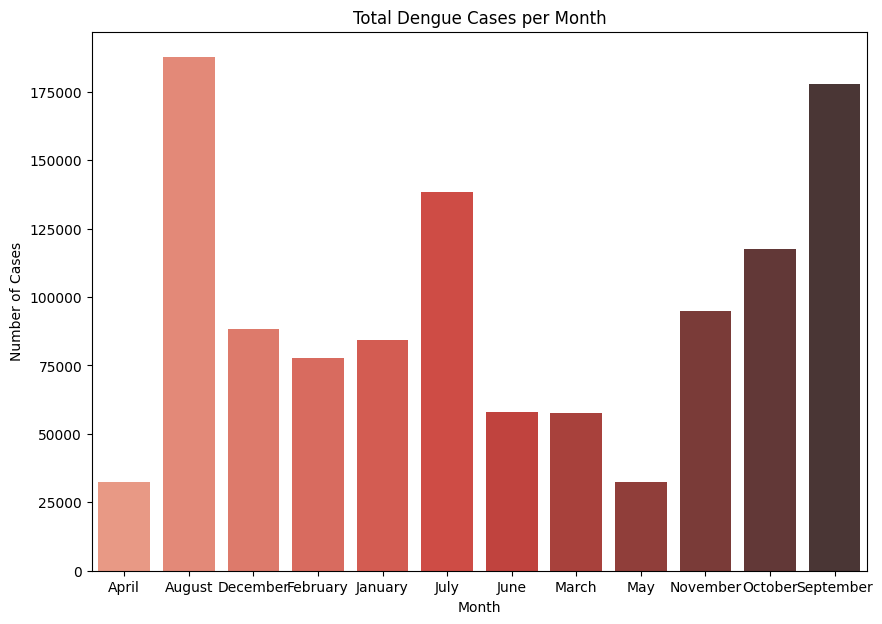

In [22]:
cases_per_month = deng.groupby('month')['dengue_cases'].sum().reset_index()

plt.figure(figsize=(10,7))
sns.barplot(data=cases_per_month, x='month', y='dengue_cases', palette='Reds_d')
plt.title('Total Dengue Cases per Month')
plt.xlabel('Month')
plt.ylabel('Number of Cases')
plt.show()

<h1>insights no.3-4</h1>
<p>Dengue cases are higest arround September</p>
<p>The peak month may indicate better surveillance or major outbreaks</p>




<h1>3)what region or city had the highest and lowest dengue cases all ove the year?</h1>

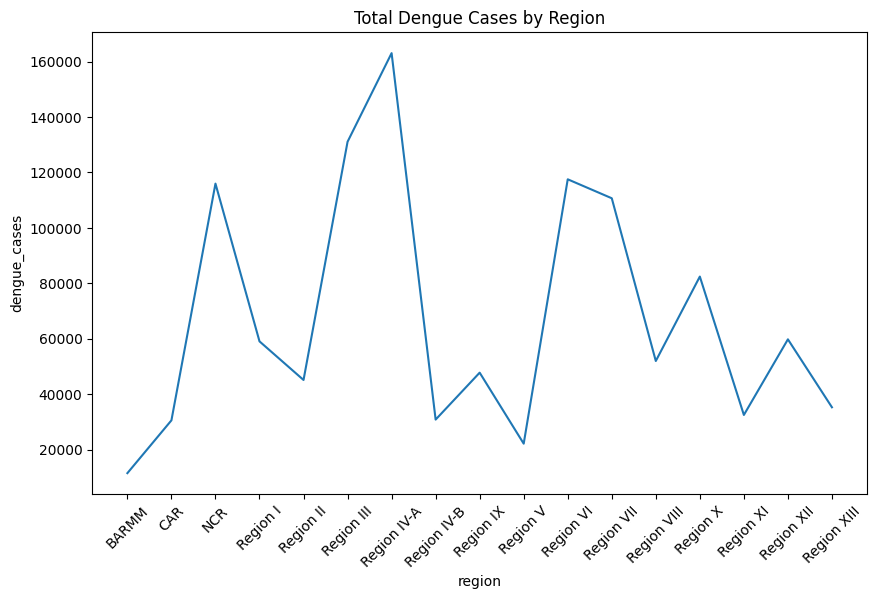

In [29]:
cases_per_region = deng.groupby('region')['dengue_cases'].sum().reset_index().sort_values(by='dengue_cases', ascending=False)

plt.figure(figsize=(10,6))
sns.lineplot(data=cases_per_region, x='region', y='dengue_cases', palette='Blues_d')
plt.title('Total Dengue Cases by Region')
plt.xticks(rotation=45)
plt.show()

<h1>insights no.5-6</h1>
<p> Based on the result region 4a had the highest number </p>
<p>Based on the result BARMM had the lowest number of dengue cases</p>

<h1>4)What is the average dengue deaths per month?</h1>


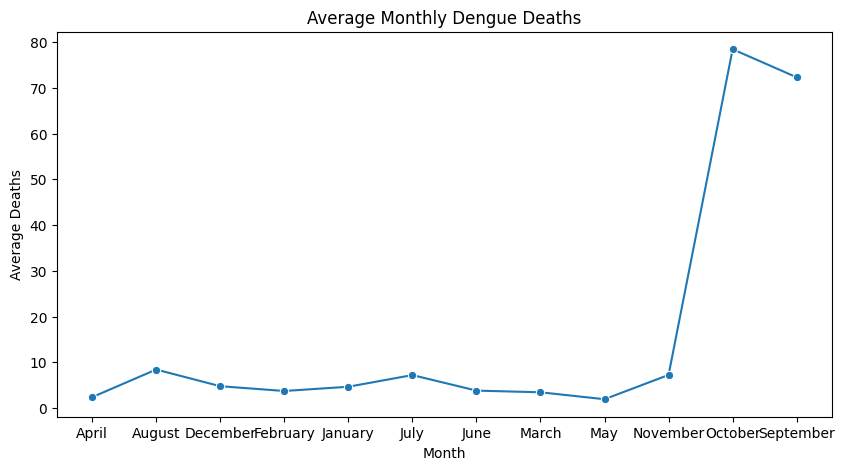

In [32]:
avg_cases_per_month = deng.groupby('month')['dengue_deaths'].mean().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(data=avg_cases_per_month, x='month', y='dengue_deaths', marker='o')
plt.title('Average Monthly Dengue Deaths')
plt.xlabel('Month')
plt.ylabel('Average Deaths')
plt.show()

<h1>insights no. 7-8</h1>
<p>Dengue deaths are highest arround october </p>
<p>The lowest dengue deaths are seen in April and May, during the dry season. This shows that weather and rainfall have a big effect on dengue deaths numbers </p>

<h1>5)Top 10 regions with highest average dengue cases per year?</h1>


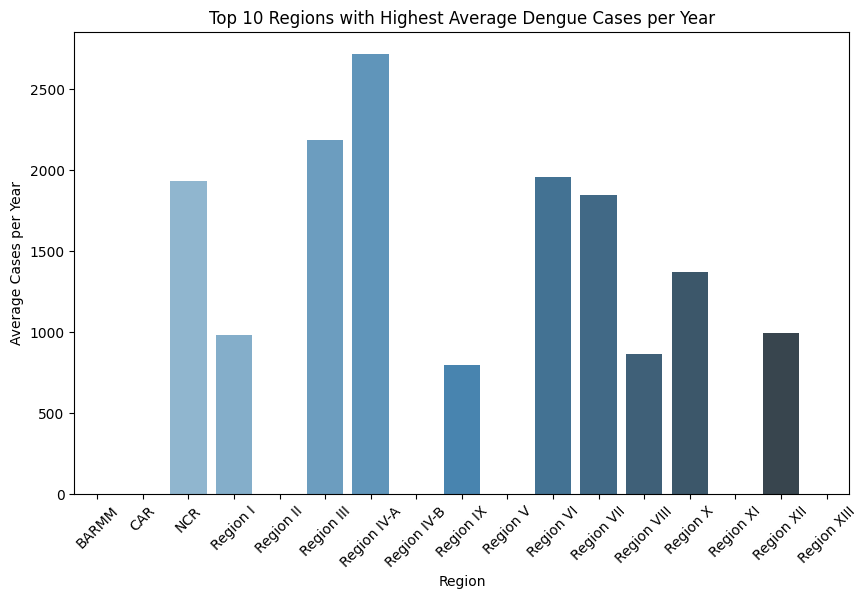

In [34]:
top_regions = deng.groupby('region')['dengue_cases'].mean().reset_index().sort_values(by='dengue_cases', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(data=top_regions, x='region', y='dengue_cases', palette='Blues_d')
plt.title('Top 10 Regions with Highest Average Dengue Cases per Year')
plt.xticks(rotation=45)
plt.xlabel('Region')
plt.ylabel('Average Cases per Year')
plt.show()

<h1>insights no. 9-10</h1>
<p> The top 10 regions consistently record high yearly averages, indicating recurring outbreaks</p>
<p>These regions should be prioritized for continuous monitoring and vector control programs</p>

<h1>6) What is the total dengue cases per region for year 2020</h1>
<hr>

In [38]:
deng[deng['year'] == 2020].groupby('region')['dengue_cases'].sum().sort_values(ascending=False)

region
Region III     15991
Region VII     12406
Region IV-A     9721
NCR             7183
Region I        7171
Region X        6225
Region IV-B     5077
Region VIII     4832
Region XII      4363
Region VI       4131
Region XIII     3983
Region IX       2684
Region XI       1936
Region V        1721
Region II       1628
BARMM           1008
CAR              981
Name: dengue_cases, dtype: int64

<h1>insights no. 11</h1>
<p>The result shows the total dengue cases per region for year 2020. The region got the highest is Region III followed by Region VIi and CAR got the lowest dengue cases.</p>


<h1>7)What is the average number of dengue cases per month across all regions?</h1>


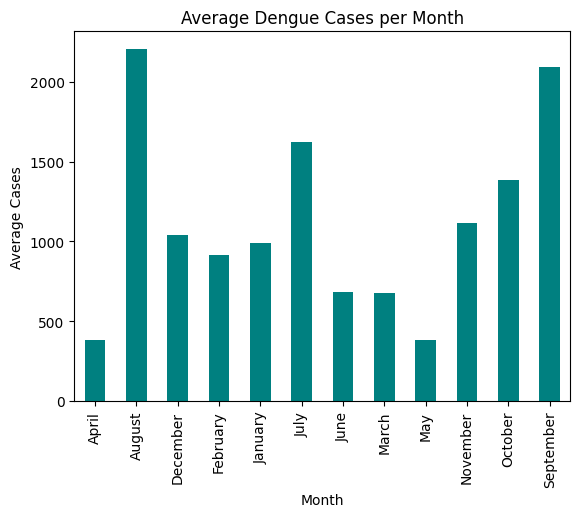

In [44]:
deng.groupby('month')['dengue_cases'].mean().plot(kind='bar', color='teal')
plt.title('Average Dengue Cases per Month')
plt.xlabel('Month')
plt.ylabel('Average Cases')
plt.show()

<h1>insights no.12-13</h1>
<p> August and September are the wet months with the largest number of dengue cases. This implies that when there is more standing water for mosquitoes to reproduce, dengue spreads more easily.</p>
<p>During the dry season, April and May had the fewest dengue cases. This demonstrates that rainfall and weather have a significant impact on the frequency of dengue cases.</p>

<h1>8)What is the average number of dengue deaths per year </h1>

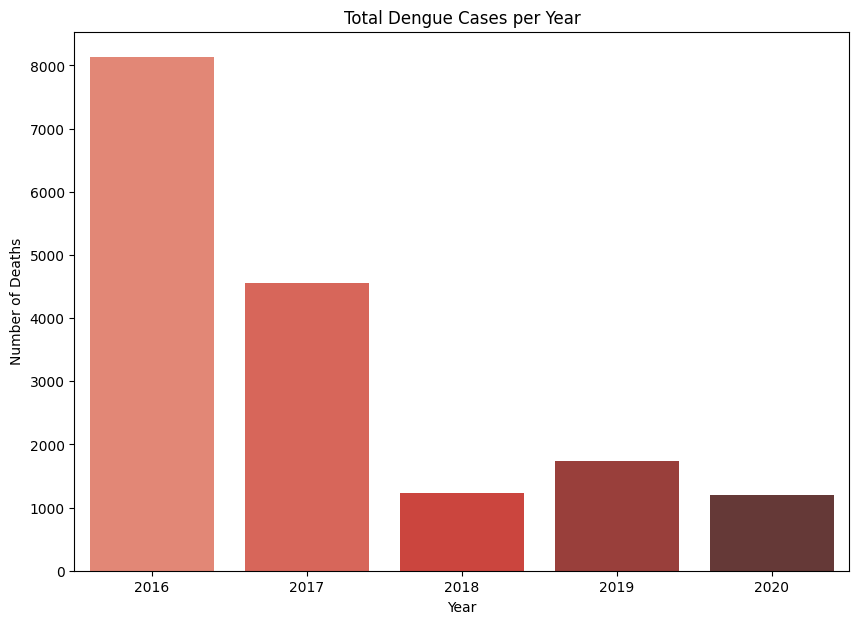

In [50]:
cases_per_year = deng.groupby('year')['dengue_deaths'].sum().reset_index()

plt.figure(figsize=(10,7))
sns.barplot(data=cases_per_year, x='year', y='dengue_deaths', palette='Reds_d')
plt.title('Total Dengue Cases per Year')
plt.xlabel('Year')
plt.ylabel('Number of Deaths')
plt.show()

<h1>insights no.14-16</h1>
<p> 2016 had the most dengue deaths around 8,000 deaths, making it the highest among all five years.</p>
<p>2018 had the fewest deaths only about 1,000 deaths, showing a big drop compared to previous years.</p>
<p>Deaths increased again after 2018 from 1,000 in 2018 to 3,000 in 2020, the numbers started rising again.</p>